# Data 54 - CS210 Project


## Introduction

This project aims to analyze the average income of various areas of Turkey across the years, revealing the existence of any significant correlation between the various regions of Turkey, average income, income inequality, and years.

It is our hope that by finding and outlining cases of inequality, or finding a trend across years when it comes to purchasing power or similar metrics, that we will be able to identify the regions that require aid and get in front of any economic downward spiral by identifying the problem. We are of the belief that problem solving starts with the most important step of properly identifying the problem, and this is what this project aims to accomplish.

### Used Libraries:

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import special
from statsmodels.stats.weightstats import ztest as ztest
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import math

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

# Exploring the Data
### 1. Importing and Cleaning the Data

The data we used,  [Distribution of annual equivalised household disposable incomes by deciles ordered by equivalised household disposable income](https://data.tuik.gov.tr/Bulten/Index?p=Gelir-Dagilimi-Istatistikleri-2022-49745), was acquired from TÜİK. This table, while containing the data we required, was formatted for human readability instead of computers. Additionally, it contained extra data which we did not require, such as Median and Percentage. As such, we first manually removed the unnecessary data and converted the values in this table into a machine-readable CSV, which we then read using Pandas.

This project was done on Google Colab. We will first start by mounting the drive and reading the CSV file:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


For our project, we split the TÜİK data into two CSV files: one of means, and one of medians.

Due to the nature of income, it tends towards extremes. For certain cases of comparing average income between regions, it is better to use median as a better indicator.

When researching income inequality between people, however, mean is more appropriate as it displays the difference in earnings between an "average" individual in the bottom 10% and an "average" individual in the top 10%.

In [ ]:
mean_df = pd.read_csv("/content/drive/MyDrive/IncomeMeanCSV.csv")
median_df = pd.read_csv("/content/drive/MyDrive/IncomeMedianCSV.csv")

We'll explore out data to ensure that it was imported correctly.

In [ ]:
mean_df.head()

,Area,Year,1. Mean,2. Mean,3. Mean,4. Mean,5. Mean,6. Mean,7. Mean,8. Mean,9. Mean,10. Mean,Total Mean
0,TR Türkiye,2021,8602.84,14251.65,18284.72,22018.88,25932.44,30431.66,35982.48,43772.51,56972.08,117761.98,37401.124
1,TR10 (İstanbul),2021,12475.84,19147.16,23913.17,28157.42,33307.14,38703.86,45637.36,55931.96,73207.49,187605.97,51808.737
2,TR21 (Tekirdağ Edirne Kırklareli),2021,11973.32,18676.56,23410.30,27709.45,31935.99,36548.24,42099.07,49151.84,61665.61,122730.33,42590.071
3,TR22 (Balıkesir Çanakkale),2021,9365.90,16097.43,19678.01,23071.24,26579.68,31044.66,35827.46,42526.45,53050.45,107514.09,36475.537
4,TR31 (İzmir),2021,12117.90,19887.47,24931.23,29587.86,34330.81,40410.52,48089.72,56685.84,71408.21,139155.94,47660.550


In [ ]:
median_df.head()

,Area,Year,1. Median,2. Median,3. Median,4. Median,5. Median,6. Median,7. Median,8. Median,9. Median,10. Median
0,TR Türkiye,2021,9030.65,14268.57,18320.00,22004.86,25915.33,30351.00,35800.00,43477.00,56431.11,88617.93
1,TR10 (İstanbul),2021,13462.22,19230.77,23969.33,28262.33,33438.46,38655.71,45496.67,55711.00,72490.48,132026.67
2,TR21 (Tekirdağ Edirne Kırklareli),2021,12412.40,18913.33,23479.05,27603.03,32114.29,36045.20,41994.00,49135.71,60038.33,94166.67
3,TR22 (Balıkesir Çanakkale),2021,9658.06,16228.33,19549.03,23082.83,26632.40,31225.33,35582.00,42005.56,52878.00,82506.67
4,TR31 (İzmir),2021,13366.67,20000.00,25158.57,29693.33,34262.00,40630.43,48262.33,56093.60,70202.50,105392.22


In [ ]:
print(mean_df.shape)
print(median_df.shape)

(216, 12)
(216, 12)


In [ ]:
#Check if all data is in a correct type
mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      216 non-null    object 
 1   Year      216 non-null    int64  
 2   1. Mean   216 non-null    float64
 3   2. Mean   216 non-null    float64
 4   3. Mean   216 non-null    float64
 5   4. Mean   216 non-null    float64
 6   5. Mean   216 non-null    float64
 7   6. Mean   216 non-null    float64
 8   7. Mean   216 non-null    float64
 9   8. Mean   216 non-null    float64
 10  9. Mean   216 non-null    float64
 11  10. Mean  216 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 20.4+ KB


In [ ]:
median_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        216 non-null    object 
 1   Year        216 non-null    int64  
 2   1. Median   216 non-null    float64
 3   2. Median   216 non-null    float64
 4   3. Median   216 non-null    float64
 5   4. Median   216 non-null    float64
 6   5. Median   216 non-null    float64
 7   6. Median   216 non-null    float64
 8   7. Median   216 non-null    float64
 9   8. Median   216 non-null    float64
 10  9. Median   216 non-null    float64
 11  10. Median  216 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 20.4+ KB


In [ ]:
#Check the existence of any duplicates
mean_df[mean_df.duplicated()].head()

,Area,Year,1. Mean,2. Mean,3. Mean,4. Mean,5. Mean,6. Mean,7. Mean,8. Mean,9. Mean,10. Mean


In [ ]:
median_df[median_df.duplicated()].head()

,Area,Year,1. Median,2. Median,3. Median,4. Median,5. Median,6. Median,7. Median,8. Median,9. Median,10. Median


We'll add new columns of Total Mean and Average Median, calculated by taking the mean of each decile for every row.

In [ ]:
mean_df["Total Mean"] = mean_df.loc[:, "1. Mean":"10. Mean"].mean(axis=1)
median_df["Average Median"] = median_df.loc[:, "1. Median":"10. Median"].mean(axis=1)

print(mean_df.head(2))
print("-----------------")
print(median_df.head(2))

              Area  Year   1. Mean   2. Mean   3. Mean   4. Mean   5. Mean  \
0       TR Türkiye  2021   8602.84  14251.65  18284.72  22018.88  25932.44   
1  TR10 (İstanbul)  2021  12475.84  19147.16  23913.17  28157.42  33307.14   

    6. Mean   7. Mean   8. Mean   9. Mean   10. Mean  Total Mean  
0  30431.66  35982.48  43772.51  56972.08  117761.98   37401.124  
1  38703.86  45637.36  55931.96  73207.49  187605.97   51808.737  
-----------------
              Area  Year  1. Median  2. Median  3. Median  4. Median  \
0       TR Türkiye  2021    9030.65   14268.57   18320.00   22004.86   
1  TR10 (İstanbul)  2021   13462.22   19230.77   23969.33   28262.33   

   5. Median  6. Median  7. Median  8. Median  9. Median  10. Median  \
0   25915.33   30351.00   35800.00    43477.0   56431.11    88617.93   
1   33438.46   38655.71   45496.67    55711.0   72490.48   132026.67   

   Average Median  
0       34421.645  
1       46274.364  


The machine learning models we will use later require numeric values. As such, we will create a mapping from the regions in Turkey to integer values.

Türkiye itself is excluded from this mapping as it will only be used for comparison with specific regions.

In [ ]:
tempdf = mean_df[(mean_df['Year'] == 2021) & (mean_df["Area"] != "TR Türkiye")]
tempdf = tempdf.sort_values(by = ["Total Mean"], ascending = False)

area_to_index = {x:i for i,x in enumerate(tempdf["Area"])}
index_to_area = {i:x for i,x in enumerate(tempdf["Area"])}

print(area_to_index)

{'TR10 (İstanbul)': 0, 'TR31 (İzmir)': 1, 'TR51 (Ankara)': 2, 'TR21 (Tekirdağ Edirne Kırklareli)': 3, 'TR32 (Aydın Denizli Muğla)': 4, 'TR41 (Bursa Eskişehir Bilecik)': 5, 'TR61 (Antalya Isparta Burdur)': 6, 'TR42 (Kocaeli Sakarya Düzce Bolu Yalova)': 7, 'TR90 (Trabzon Ordu Giresun Rize Artvin Gümüşhane)': 8, 'TR22 (Balıkesir Çanakkale)': 9, 'TR81 (Zonguldak Karabük Bartın)': 10, 'TR33 (Manisa Afyon Kütahya Uşak)': 11, 'TR83 (Samsun Tokat Çorum Amasya)': 12, 'TR82 (Kastamonu Çankırı Sinop)': 13, 'TR52 (Konya Karaman)': 14, 'TR71 (Kırıkkale Aksaray Niğde Nevşehir Kırşehir)': 15, 'TR72 (Kayseri Sivas Yozgat)': 16, 'TR62 (Adana Mersin)': 17, 'TRA1 (Erzurum Erzincan Bayburt)': 18, 'TRC1 (Gaziantep Adıyaman Kilis)': 19, 'TRB1 (Malatya Elazığ Bingöl Tunceli)': 20, 'TR63 (Hatay Kahramanmaraş Osmaniye)': 21, 'TRA2 (Ağrı Kars Iğdır Ardahan)': 22, 'TRC2 (Şanlıurfa Diyarbakır)': 23, 'TRC3 (Mardin Batman Şırnak Siirt)': 24, 'TRB2 (Van Muş Bitlis Hakkari)': 25}


### 2. Exploratory Data Analysis

Now that we have done preliminary checks and preparations, we can begin to explore our dataset to see if we notice any interesting correlations.

For this purpose, we will use matplotlib to visualize our findings.

In order to visualize and work with data in regions, we will calculate standard deviation and mean from the 10 decile groups by imputing the mean/median for the values. While this is not ideal, as we will be comparing these estimated values between eachother instead of with other independent variables, this estimation is acceptable for our intent.

These estimations, while not directly giving a reliable number, will result in reliable comparisons which is our area of interest.

In [ ]:
#The 10 median values of decile groups in Istanbul during the year 2021
tempdf = median_df[median_df['Year'] == 2021]
istanbulList = tempdf[tempdf["Area"] == "TR10 (İstanbul)"].drop(["Area", "Year"], axis=1).values 

#Calculate mean and standard deviation from these values
istMean = istanbulList.mean()
istStd = istanbulList.std()

#create a random sample of 10.000 income values from the mean and estimated std deviation
randomIstList = np.random.normal(istMean, istStd, 10000)


#Our distribution has negative numbers, which does not make sense for income. We will iterate over the list and re-generate a number for each of these instances until we get a positive number
for i, x in enumerate(randomIstList):
  while x < 0:
    x = np.random.normal(istMean, istStd)

  randomIstList[i] = x

#Perform the same tasks for TRB2 (Van Muş Bitlis Hakkari)
vanList = tempdf[tempdf["Area"] == "TRB2 (Van Muş Bitlis Hakkari)"].drop(["Area", "Year"], axis=1).values 

vanMean = vanList.mean()
vanStd = vanList.std()

randomVanList = np.random.normal(vanMean, vanStd, 10000)

for i, x in enumerate(randomVanList):
  while x < 0:
    x = np.random.normal(vanMean, vanStd)

  randomVanList[i] = x


#Check to ensure no negative numbers exist
print("Minimum value for Random Istanbul List: {}".format(min(randomIstList)))
print("Minimum value for Random Van List: {}".format(min(randomVanList)))

Minimum value for Random Istanbul List: 42.40927835008915
Minimum value for Random Van List: 3.868927256338793


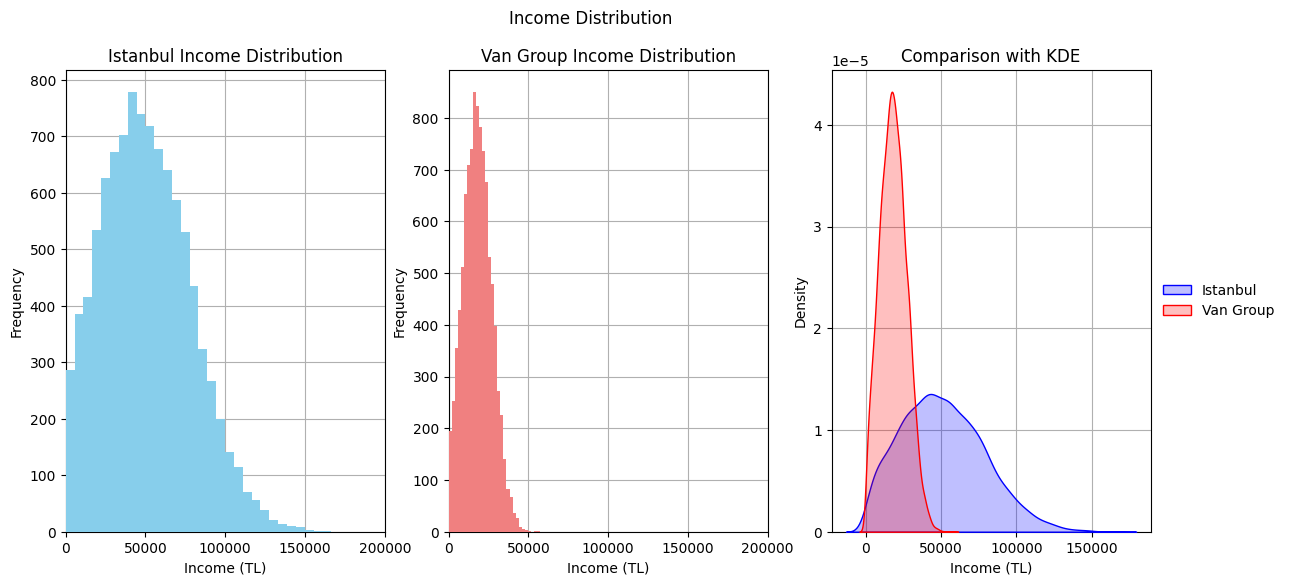

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))

ax[0].hist(randomIstList, bins=30, zorder=3, color="skyblue")
ax[0].grid(zorder=0)
ax[0].set_xlim(0, 200000)

ax[0].set_title("Istanbul Income Distribution")
ax[0].set_xlabel("Income (TL)")
ax[0].set_ylabel("Frequency")

ax[1].hist(randomVanList, bins=30, zorder=3, color="lightcoral")
ax[1].grid(zorder=0)
ax[1].set_xlim(0, 200000)

ax[1].set_title("Van Group Income Distribution")
ax[1].set_xlabel("Income (TL)")
ax[1].set_ylabel("Frequency")

sns.kdeplot(randomIstList, fill=True,label="Istanbul",ax=ax[2],color="b",zorder=3)
sns.kdeplot(randomVanList, fill=True,label="Van Group",ax=ax[2],color="r",zorder=3)
ax[2].set_title("Comparison with KDE")
ax[2].set_xlabel("Income (TL)")
ax[2].grid(zorder=0)

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           frameon=False)

plt.suptitle("Income Distribution")
plt.show()

As can be seen, Istanbul is spread out more evenly across the 0-150000 TL range whereas Van group is contained almost entirely within 0-50000, an income so low that the mean of Istanbul is near the right tail of Van Group. This graphic visualizes the large difference in average income for two different regions, displaying the inequality.

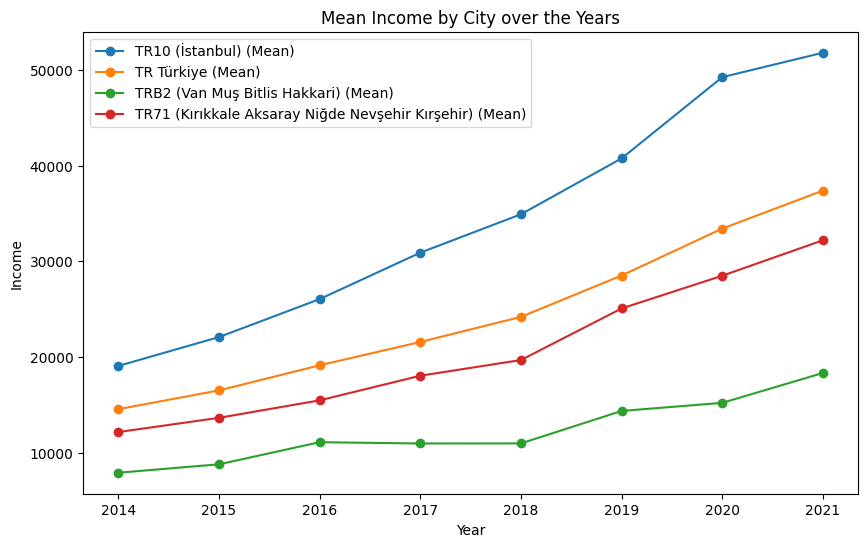

In [ ]:
grouped_df = mean_df.groupby(['Area', 'Year']).agg({'Total Mean': 'mean'}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

cities_to_plot = ['TR10 (İstanbul)', 'TR Türkiye', 'TRB2 (Van Muş Bitlis Hakkari)', 'TR71 (Kırıkkale Aksaray Niğde Nevşehir Kırşehir)']  # The list of regions

for city in cities_to_plot:
    city_data = grouped_df[grouped_df['Area'] == city]
    ax.plot(city_data['Year'], city_data['Total Mean'], label=f'{city} (Mean)',marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Income')
ax.set_title('Mean Income by City over the Years')

ax.legend()

plt.show()

Over the years, regardless of region (or Turkey in general), we see a trend of mean income increasing. However, this increase is not equal: for regions that already are wealth, such as Istanbul, we see that the increase is larger compared to the poorer region of Van, where the increase is much more gradual.

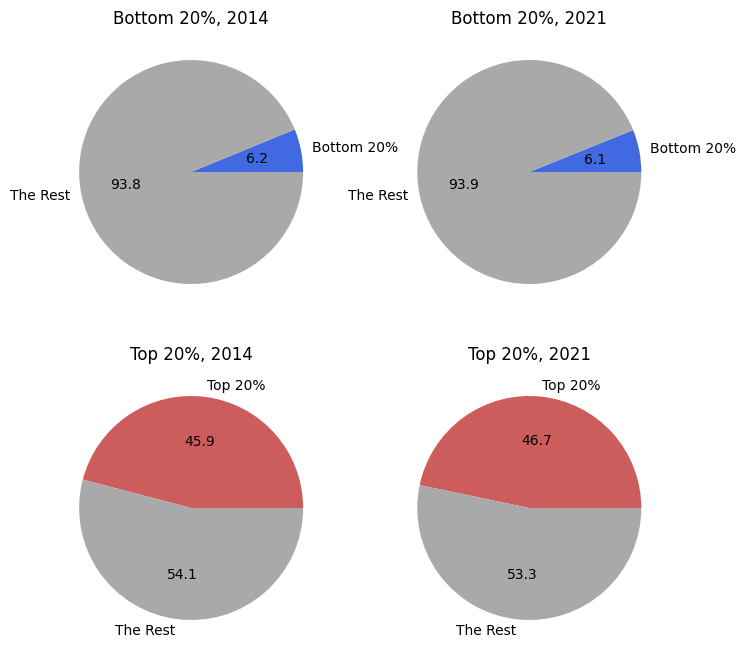

In [ ]:
turkey2014 = mean_df[(mean_df['Area'] == "TR Türkiye") & (mean_df['Year'] == 2014)]
turkey2021 = mean_df[(mean_df['Area'] == "TR Türkiye") & (mean_df['Year'] == 2021)]

#Calculate the sums for 2014
bottom20_14 = turkey2014.loc[:, "1. Mean" : "2. Mean"].sum(axis = 1) 
top20_14 = turkey2014.loc[:, "9. Mean" : "10. Mean"].sum(axis = 1)
sum14 = turkey2014.loc[:, "1. Mean" : "10. Mean"].sum(axis = 1)

toppercentage14 = (top20_14 *100) / sum14
botpercentage14 = (bottom20_14 * 100)/ sum14

#Calculate the sums for 2021
bottom20_21 = turkey2021.loc[:, "1. Mean" : "2. Mean"].sum(axis = 1)
top20_21 = turkey2021.loc[:, "9. Mean" : "10. Mean"].sum(axis = 1)
sum21 = turkey2021.loc[:, "1. Mean" : "10. Mean"].sum(axis = 1)

toppercentage21 = (top20_21 * 100) / sum21
botpercentage21 = (bottom20_21 * 100) / sum21


nc1 = 100 - botpercentage14
nc2 = 100 - toppercentage14
nc3 = 100 - botpercentage21
nc4 = 100 - toppercentage21

colorBot = ["royalblue", "darkgray"]
colorTop = ["indianred", "darkgray"]
fig, ax = plt.subplots(2, 2, figsize=(8,8))

x = np.array([botpercentage14, nc1])
mylabels1 =  ["Bottom 20%", "The Rest"]
ax[0][0].pie(x.flatten(), labels = mylabels1, autopct='%.1f', colors = colorBot)
ax[0][0].set_title("Bottom 20%, 2014")

print("\n")

y = np.array([toppercentage14, nc2])
mylabels2 = ["Top 20%", "The Rest"]
ax[1][0].pie(y.flatten(), labels = mylabels2, autopct='%.1f', colors = colorTop)
ax[1][0].set_title("Top 20%, 2014")

z = np.array([botpercentage21, nc3])
mylabels3 = ["Bottom 20%", "The Rest"]
ax[0][1].pie(z.flatten(), labels = mylabels3, autopct='%.1f', colors = colorBot)
ax[0][1].set_title("Bottom 20%, 2021")

f = np.array([toppercentage21, nc4])
mylabels4 = ["Top 20%", "The Rest"]
ax[1][1].pie(f.flatten(), labels = mylabels4, autopct='%.1f', colors = colorTop)
ax[1][1].set_title('Top 20%, 2021')

plt.show()

When comparing the bottom 20% and the top 20% in terms of the percentage of total money they possess, we see that the bottom 20% owns only 6-7% of all income, whereas the top 20% owns nearly half of all income in Turkey. Additionally, we see a very gradual trend of the percentage of income which the bottom 20% posesses decreasing over time, whereas the money the top 20% posesses increases.

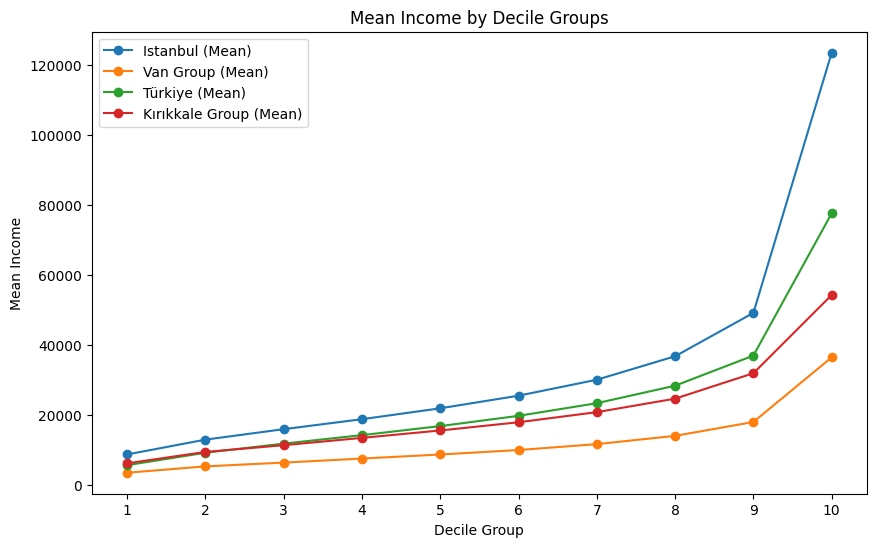

In [ ]:
x = range(1, 11)

y_istanbul_mean = mean_df[mean_df["Area"] == "TR10 (İstanbul)"].drop(["Area", "Year", "Total Mean"], axis=1).mean().values
y_van_mean = mean_df[mean_df["Area"] == "TRB2 (Van Muş Bitlis Hakkari)"].drop(["Area", "Year", "Total Mean"], axis=1).mean().values
y_turkey_mean = mean_df[mean_df["Area"] == "TR Türkiye"].drop(["Area", "Year", "Total Mean"], axis=1).mean().values
y_kkale_mean = mean_df[mean_df["Area"] == "TR71 (Kırıkkale Aksaray Niğde Nevşehir Kırşehir)"].drop(["Area", "Year", "Total Mean"], axis=1).mean().values

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y_istanbul_mean, label='Istanbul (Mean)', marker='o')
ax.plot(x, y_van_mean, label='Van Group (Mean)', marker='o')
ax.plot(x, y_turkey_mean, label='Türkiye (Mean)', marker='o')
ax.plot(x, y_kkale_mean, label='Kırıkkale Group (Mean)', marker='o')

ax.set_xlabel('Decile Group')
ax.set_ylabel('Mean Income')
ax.set_title('Mean Income by Decile Groups')
ax.legend()
plt.xticks(x)

plt.show()

When plotting the mean income of the decile groups averaged over the years, we see that from groups 1-8 there is a gradual and consistent increase, a sharp increase from 8 to 9, and a massive spike from 9 to 10. The size of these spikes change from region to region, but the general trend stays the same.

From this, we can clearly infer that while most decile groups 'share' wealth in a consistent manner, the 10th decile group posesses an incredible amount of wealth, not following the convention set by the previous 9 groups.

# Hypothesis Testing
Now that we have done some basic analysis into our data and gained insight about general trends, we will perform mathematical testing of our hypotheses.

## Hypothesis 1 - Average income depends on location

**Null Hypothesis**: Location has no impact on average income.

**Alternative Hypothesis**: Location has an impact on average income.

To confirm or reject our hypothesis, we may perform the z-test by considering a normal distribution with mean and standard deviation of Turkey, and see how our randomized samples from Istanbul compare.

For this test, we will use median instead of mean as due to the nature of income there are many outliers that skew the mean. Our sample will be Istanbul whereas our population will be Turkey, and we will compare the median income in the year 2021 (the most recent data).

The general steps taken will be that we will first calculate the rough estimate of Turkey's mean and standard deviation through the decile groups, and then generate samples from Istanbul's data to compare to Turkey.

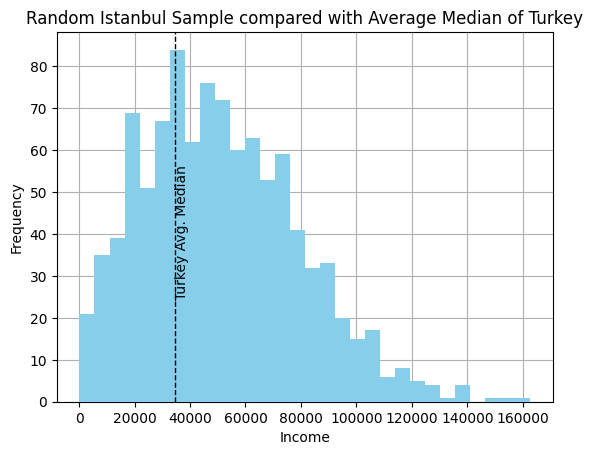

In [ ]:
#Get a list of the median incomes in Turkey in 2021
tempdf = median_df[median_df['Year'] == 2021]
turkeyMedianList = tempdf[tempdf["Area"] == "TR Türkiye"].drop(["Area", "Year", "Average Median"], axis=1).values


#Calculate the Population mean
turkeyMean = round(turkeyMedianList.mean(),2)


#Get the same list for Istanbul
istMedianList = tempdf[tempdf["Area"] == "TR10 (İstanbul)"].drop(["Area", "Year", "Average Median"], axis=1).values

#Calculate the Sample mean/std to generate our values
istMedianAvr = round(istMedianList.mean(),2)
istMedianStd = round(istMedianList.std(),2)

#generate our random values
randomIst = np.random.normal(istMedianAvr, istMedianStd, 1000)

#Fix negative numbers in our list
for i, x in enumerate(randomIst):
  while x < 0:
    x = np.random.normal(istMedianAvr, istMedianStd)

  randomIst[i] = x

#Plot our random sample and the average median of turkey
plt.hist(randomIst, bins=30, zorder=3, color="skyblue")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.grid(zorder=0)
plt.axvline(turkeyMean, color='k', linestyle='dashed', linewidth=1, zorder=4)
plt.text(turkeyMean + 200,25,'Turkey Avg. Median',rotation=90)
plt.title("Random Istanbul Sample compared with Average Median of Turkey")
plt.show()

In [ ]:
#calculate the p-value with a ztest
z_score, p_value = ztest(randomIst, value=turkeyMean)

#compare the p-value with our alpha
alpha = 0.001
if p_value < alpha:
  print("We reject the Null Hypothesis.")
else:
  print("We fail to reject the Null Hypothesis.")

We reject the Null Hypothesis.


As can be seen, our p-value is lower than our chosen alpha, indicating that the probability of the Istanbul sample occuring naturally within the Turkey population is extremely unlikely - indicating that there is, indeed, an effect on income depending on the location. Thus, we have proved our first hypothesis.

# Hypothesis 2 - Income inequality increases with time

**Null Hypothesis**: There is no difference between the income inequality of 2014-2015 and 2020-2021.

**Alternate Hypothesis**: There is a difference between the income inequality of 2014-2015 and 2020-2021

54


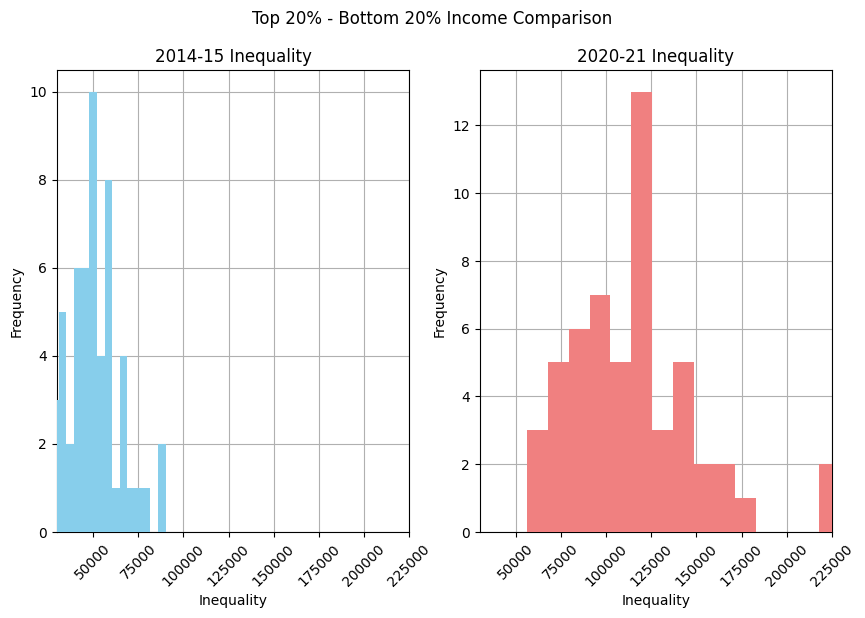

In [ ]:
# Calculate the third column
mean_diff = (mean_df['10. Mean'] + mean_df['9. Mean']) - (mean_df['2. Mean'] + mean_df['1. Mean'])

# Create a new dataframe with the rearranged columns
ineq_df = pd.DataFrame({
    'Year': mean_df['Year'],
    'Area': mean_df['Area'],
    'Mean_diff': mean_diff
})

#get our two values to compare
old_ineq_values = ineq_df[(ineq_df["Year"] == 2014) | (ineq_df["Year"] == 2015)]["Mean_diff"].values
new_ineq_values = ineq_df[(ineq_df["Year"] == 2020) | (ineq_df["Year"] == 2021)]["Mean_diff"].values

#Plot our two samples
fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].hist(old_ineq_values, bins=15, zorder=3, color="skyblue")
ax[0].grid(zorder=0)


ax[0].set_title("2014-15 Inequality")
ax[0].set_xlabel("Inequality")
ax[0].set_ylabel("Frequency")
ax[0].tick_params(axis='x', labelrotation = 45)
ax[0].set_xlim(30000, 225000)

ax[1].hist(new_ineq_values, bins=15, zorder=3, color="lightcoral")
ax[1].grid(zorder=0)

ax[1].set_title("2020-21 Inequality")
ax[1].set_xlabel("Inequality")
ax[1].set_ylabel("Frequency")
ax[1].tick_params(axis='x', labelrotation = 45)
ax[1].set_xlim(30000, 225000)


plt.suptitle("Top 20% - Bottom 20% Income Comparison")

plt.show()

In [ ]:
#Now that we have our two sets of values, we can perform a t-test to see if there exists a significant difference
_,p_value = stats.ttest_ind(old_ineq_values, new_ineq_values, equal_var=False)
alpha = 0.01

if p_value < alpha:
  print("We reject the Null Hypothesis.")
else:
  print("We fail to reject the Null Hypothesis.")

We reject the Null Hypothesis.


As can be seen, through the use of t-testing we have determined that these two samples are significantly different from each other, indicating that there is a strong correlation between date and income inequality. Thus, we have proved our second Alternate Hypothesis.

# Hypothesis 3 - Purchasing power decreases with time



**Null Hypothesis**: There is no relation between date and purchasing power.

**Alternative Hypothesis**: There is a relationship between date and purchasing power.

For this hypothesis, we wanted to see if purchasing power had a significant decrease as time progressed, to see if we could statistically prove an indication of a declining economy. To this end, we made use of another dataset, [Consumer price index across the years](https://data.tuik.gov.tr/Bulten/Index?p=Tüketici-Fiyat-Endeksi-Aralık-2022-49651) which allowed us to calculate the purchasing power of regions. 

We then performed T-tests on our two samples, one from 2014 and one from 2021, to see if there exists a significant difference.


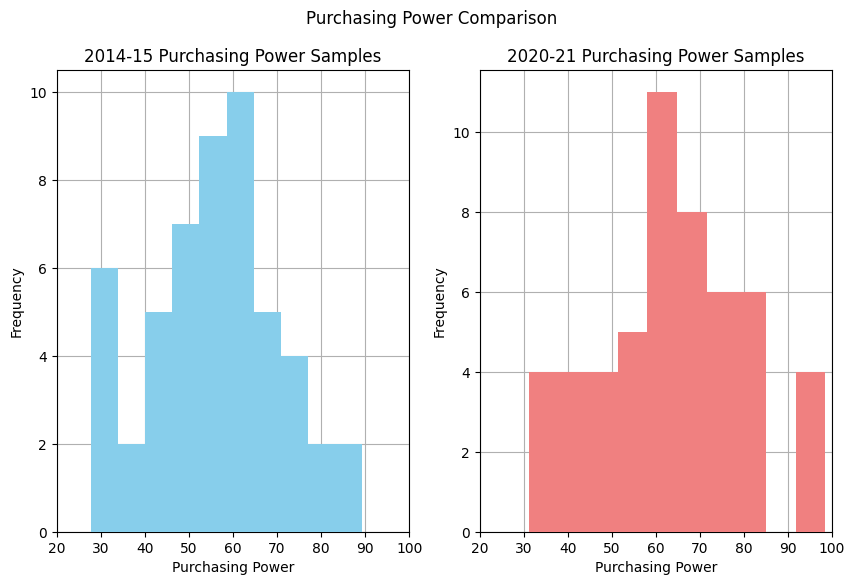

In [ ]:
#Read the consumer price index data
cpi_df = pd.read_csv("/content/drive/MyDrive/CPI.csv")

#create average cpi of the year
cpi_df["Average CPI"] = cpi_df.loc[:, "January":"December"].mean(axis=1).round(2)

cpi_df = cpi_df[["Year", "Average CPI"]]

pp_df_14 = median_df[(median_df["Area"] != "TR Türkiye") & ((median_df["Year"] == 2014) | (median_df["Year"] == 2015))]

pp_df_14 = pp_df_14.assign(PurchasingPower=(pp_df_14["Average Median"] / cpi_df[(cpi_df["Year"] == 2014) | (cpi_df["Year"] == 2015)]["Average CPI"].values[0]).round(2))

pp_df_21 = median_df[(median_df["Area"] != "TR Türkiye") & ((median_df["Year"] == 2020) | (median_df["Year"] == 2021))]
pp_df_21 = pp_df_21.assign(PurchasingPower=(pp_df_21["Average Median"] / cpi_df[(cpi_df["Year"] == 2020) | (cpi_df["Year"] == 2021)]["Average CPI"].values[0]).round(2))

#get our two lists
oldPPValues = pp_df_14["PurchasingPower"].values
newPPValues = pp_df_21["PurchasingPower"].values

#Plot our two samples
fig, ax = plt.subplots(1, 2, figsize=(10,6))

ax[0].hist(oldPPValues, bins=10, zorder=3, color="skyblue")
ax[0].grid(zorder=0)


ax[0].set_title("2014-15 Purchasing Power Samples")
ax[0].set_xlabel("Purchasing Power")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim(20,100)

ax[1].hist(newPPValues, bins=10, zorder=3, color="lightcoral")
ax[1].grid(zorder=0)

ax[1].set_title("2020-21 Purchasing Power Samples")
ax[1].set_xlabel("Purchasing Power")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim(20,100)

plt.suptitle("Purchasing Power Comparison")
plt.show()

In [ ]:
#Now that we have our two sets of values, we can perform a t-test to see if there exists a significant difference
_,p_value = stats.ttest_ind(oldPPValues, newPPValues, equal_var=False)
alpha = 0.01

if p_value < alpha:
  print("We reject the Null Hypothesis.")
else:
  print("We fail to reject the Null Hypothesis.")

We fail to reject the Null Hypothesis.


For this hypothesis, our p_value is not low enough to prove any significance between date and purchasing power. As such, we can not say anything conclusively about purchasing power and date: purchasing power in 2021 may simply be a natural result, or it might be affected by date.


# Machine Learning

As the final part of our project, in this section we will use machine learning models to attempt to predict mean income given a region and a year, such as the theoretical mean of Istanbul in the year 2030.

If successful, these machine learning models may help predict upcoming trends in income, inequality and purchasing power, allowing us to see the severity of any problems that may arise in the future.

### Mapping Objects to Integers
As the machine learning models we use only support numeric values, we will use the mapping we created earlier to create a new dataframe with the suitable types.

In [ ]:
#drop Turkey as it is not included in our mapping
mean_df_ml = mean_df.drop(mean_df[mean_df["Area"] == "TR Türkiye"].index)
mean_df_ml["Area"].replace(area_to_index, inplace=True)

median_df_ml = median_df.drop(median_df[median_df["Area"] == "TR Türkiye"].index)
median_df_ml["Area"].replace(area_to_index, inplace=True)

#drop the averages as these will simply be recalculated
mean_df_ml.drop(["Total Mean"], axis=1, inplace=True)
median_df_ml.drop(["Average Median"], axis=1, inplace=True)

## 1 - Linear Regression

In [ ]:
#Split into features and labels

features = mean_df_ml[["Area", "Year"]].values
labels = mean_df_ml.drop(["Area", "Year"], axis=1).values

#Perform train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 40)

#Fit the training data
reg = LinearRegression().fit(X_train, y_train)

#Testing our model

#1 - on the training set
y_pred_train = reg.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
mae = mean_absolute_error(y_train, y_pred_train)

#2 - on the test set
y_pred_test = reg.predict(X_test)
r2_t = r2_score(y_test, y_pred_test)
mae_t = mean_absolute_error(y_test, y_pred_test)

print("R2 Score for training data: {}".format(r2))
print("MAE for training data: {}".format(mae))
print("-----------------")
print("R2 Score for test data: {}".format(r2_t))
print("MAE for test data: {}".format(mae_t))

linear_r2 = r2_t
linear_mae = mae_t

R2 Score for training data: 0.8846123865026859
MAE for training data: 2602.7937723388086
-----------------
R2 Score for test data: 0.8685676482064169
MAE for test data: 2393.950168590739


For linear regression, our R2 score is 0.86 on the test data and our Mean Absolute Error is 2393. Mean Absolute Error being high is expected due to the size of entries in our data, while R2 score shows that our model is fairly accurate. However, we will experiment with different models to find an ideal one.

## 2 - Polynomial Regression


For polynomial regression, we will try all degrees of polynomials up to degree 10 to see which one shows the best performance for our data.

In [ ]:
# Split into features and labels
features = mean_df_ml[["Area", "Year"]].values
labels = mean_df_ml.drop(["Area", "Year"], axis=1).values

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40)

degrees = range(1, 11)  # Degrees of polynomial regression to try

test_r2 = []
train_r2 = []
test_mae = []
train_mae = []

for degree in degrees:
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    # Fit the training data
    reg = LinearRegression().fit(X_train_poly, y_train)

    # Predict on training set
    y_pred_train = reg.predict(X_train_poly)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    train_r2.append(r2_train)
    train_mae.append(mae_train)

    # Predict on test set
    y_pred_test = reg.predict(X_test_poly)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    test_r2.append(r2_test)
    test_mae.append(mae_test)

    print(f"Degree: {degree}")
    print("R2 Score for training data:", r2_train)
    print("MAE for training data:", mae_train)
    print("R2 Score for test data:", r2_test)
    print("MAE for test data:", mae_test)
    print("-----------------")

Degree: 1
R2 Score for training data: 0.8846123865026858
MAE for training data: 2602.793772338811
R2 Score for test data: 0.8685676482064174
MAE for test data: 2393.9501685906903
-----------------
Degree: 2
R2 Score for training data: 0.9406525750622878
MAE for training data: 1804.9165530489122
R2 Score for test data: 0.9197395444910101
MAE for test data: 1769.4572188764328
-----------------
Degree: 3
R2 Score for training data: 0.9547282324041717
MAE for training data: 1546.6391175489312
R2 Score for test data: 0.9359977261126868
MAE for test data: 1604.6378440043131
-----------------
Degree: 4
R2 Score for training data: 0.9575630484104767
MAE for training data: 1475.0754779921613
R2 Score for test data: 0.942127748447748
MAE for test data: 1482.112831021536
-----------------
Degree: 5
R2 Score for training data: 0.9608029505592848
MAE for training data: 1395.7640061508548
R2 Score for test data: 0.9440669056924182
MAE for test data: 1440.9704182630269
-----------------
Degree: 6
R2 

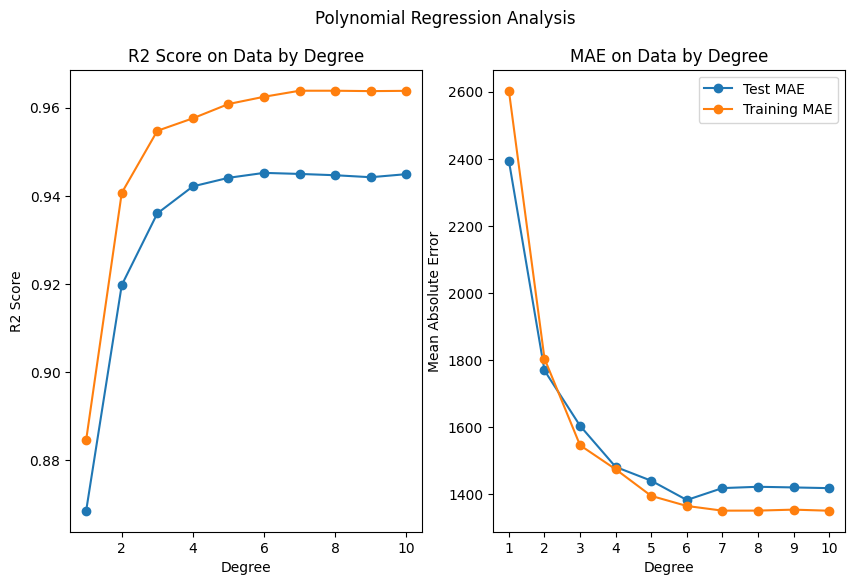

In [ ]:
#Plotting our resulting r2 scores
x = range(1, 11)

fig, ax = plt.subplots(1,2,figsize=(10, 6))

ax[0].plot(x, test_r2, label='Test R2 Scores', marker='o')
ax[0].plot(x, train_r2, label='Training R2 Scores', marker='o')

ax[0].set_xlabel('Degree')
ax[0].set_ylabel('R2 Score')
ax[0].set_title('R2 Score on Data by Degree')

ax[1].plot(x, test_mae, label='Test MAE', marker='o')
ax[1].plot(x, train_mae, label='Training MAE', marker='o')

ax[1].set_xlabel('Degree')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_title('MAE on Data by Degree')

plt.legend()
plt.xticks(x)
plt.suptitle("Polynomial Regression Analysis")
plt.show()

We see that while there are minor changes in R2 score, after degree 6 we do not see any significant improvement to test data R2 score. As such, to avoid overfitting errors we determine that a 4th degree polynomial is the best option for our dataset.

In [ ]:
poly_r2 = test_r2[5]
poly_mae = test_mae[5]

## 3 - Decision Tree


In [ ]:
#We split the data 
features = mean_df_ml[["Area", "Year"]].values
labels = mean_df_ml.drop(["Area", "Year"], axis=1).values

#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

test_r2 = []
train_r2 = []
test_mae = []
train_mae = []

depths = range(1, 11)
#Make a Decision Tree Regressor model 
for i in depths:
  model= DecisionTreeRegressor(random_state=20, max_depth=i)

  #Fitting our data into the model
  model.fit(X_train, y_train)

  #Predicting the values for the training set
  y_pred_train = model.predict(X_train)
  mae = mean_absolute_error(y_train, y_pred_train)
  r2_tree = r2_score(y_train, y_pred_train)
  train_r2.append(r2_tree)
  train_mae.append(mae)

  #Predicting the values for the test set
  y_pred_test = model.predict(X_test)
  mae1 = mean_absolute_error(y_test, y_pred_test)
  r2_tree1 = r2_score(y_test, y_pred_test)
  test_r2.append(r2_tree1)
  test_mae.append(mae1)

  print("R2 Score for {} depth on training data: {}".format(i, r2_tree))
  print("MAE Score for {} depth on training data: {}".format(i, mae))
  print("\n")
  print("R2 Score for {} depth on test data: {}".format(i, r2_tree1))
  print("MAE Score for {} depth on test data: {}".format(i, mae1))
  print("-----------------")

R2 Score for 1 depth on training data: 0.47039818651789805
MAE Score for 1 depth on training data: 5398.81754109529


R2 Score for 1 depth on test data: 0.135214292959855
MAE Score for 1 depth on test data: 5158.240185108223
-----------------
R2 Score for 2 depth on training data: 0.681195819310773
MAE Score for 2 depth on training data: 4160.1163013763635


R2 Score for 2 depth on test data: 0.47861754159498526
MAE Score for 2 depth on test data: 4413.2987944679535
-----------------
R2 Score for 3 depth on training data: 0.8010864193974747
MAE Score for 3 depth on training data: 3182.7115061122727


R2 Score for 3 depth on test data: 0.6465390352557491
MAE Score for 3 depth on test data: 3350.217114823305
-----------------
R2 Score for 4 depth on training data: 0.88172165207988
MAE Score for 4 depth on training data: 2339.557039055264


R2 Score for 4 depth on test data: 0.7494283713928465
MAE Score for 4 depth on test data: 2880.9514890858773
-----------------
R2 Score for 5 depth on

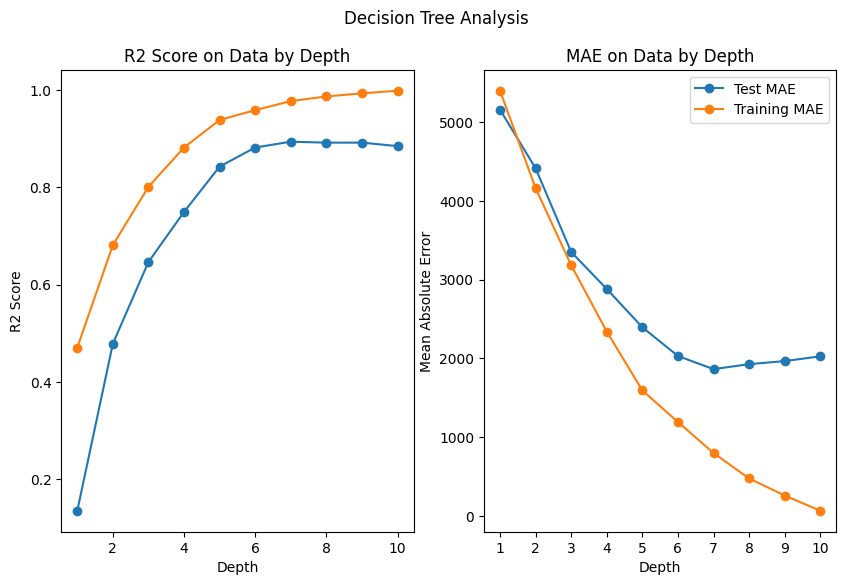

In [ ]:
#Plot the results
x = range(1, 11)

fig, ax = plt.subplots(1,2,figsize=(10, 6))

ax[0].plot(x, test_r2, label='Test R2 Scores', marker='o')
ax[0].plot(x, train_r2, label='Training R2 Scores', marker='o')

ax[0].set_xlabel('Depth')
ax[0].set_ylabel('R2 Score')
ax[0].set_title('R2 Score on Data by Depth')

ax[1].plot(x, test_mae, label='Test MAE', marker='o')
ax[1].plot(x, train_mae, label='Training MAE', marker='o')

ax[1].set_xlabel('Depth')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_title('MAE on Data by Depth')

plt.legend()
plt.xticks(x)
plt.suptitle("Decision Tree Analysis")
plt.show()

Similar to the polynomial regression case, after a certain depth (in this case, 7) we see a reduction in test data r2 score, indicating that ovefitting is occurring. As such, we will take the depth as 7 for the best performance of the random forest model.

In [ ]:
tree_r2 = test_r2[6]
tree_mae = test_mae[6]

## 4 - Random Forest


In [ ]:
# Split into features and labels
features = mean_df_ml[["Area", "Year"]].values
labels = mean_df_ml.drop(["Area", "Year"], axis=1).values

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40)

n_estimators = [i * 10 for i in range(1,11)]

test_r2 = []
train_r2 = []
test_mae = []
train_mae = []

for n in n_estimators:
# Create and fit the random forest model
  rf = RandomForestRegressor(n_estimators=n, random_state=42)
  rf.fit(X_train, y_train)

  # Testing our model

  # 1 - on the training set
  y_pred_train = rf.predict(X_train)
  r2 = r2_score(y_train, y_pred_train)
  mae = mean_absolute_error(y_train, y_pred_train)
  train_r2.append(r2)
  train_mae.append(mae)

  # 2 - on the test set
  y_pred_test = rf.predict(X_test)
  r2_t = r2_score(y_test, y_pred_test)
  mae_t = mean_absolute_error(y_test, y_pred_test)
  test_r2.append(r2_t)
  test_mae.append(mae_t)

  print("R2 Score for {} estimators on training data: {}".format(n, r2))
  print("MAE for {} estimators on training data: {}".format(n, mae))
  print("\n")
  print("R2 Score for {} estimators on test data: {}".format(n, r2_t))
  print("MAE for {} estimators on test data: {}".format(n, mae_t))
  print("-----------------")

R2 Score for 10 estimators on training data: 0.9894748856335209
MAE for 10 estimators on training data: 688.9552740963858


R2 Score for 10 estimators on test data: 0.9257337154073078
MAE for 10 estimators on test data: 1511.7976642857143
-----------------
R2 Score for 20 estimators on training data: 0.9909308946198202
MAE for 20 estimators on training data: 655.5841481927713


R2 Score for 20 estimators on test data: 0.9268258594987564
MAE for 20 estimators on test data: 1517.612386904761
-----------------
R2 Score for 30 estimators on training data: 0.9912807364573808
MAE for 30 estimators on training data: 639.0449963855419


R2 Score for 30 estimators on test data: 0.929371047771481
MAE for 30 estimators on test data: 1490.528934126984
-----------------
R2 Score for 40 estimators on training data: 0.9916494681524795
MAE for 40 estimators on training data: 634.2754917168674


R2 Score for 40 estimators on test data: 0.9293519169882491
MAE for 40 estimators on test data: 1492.7573035

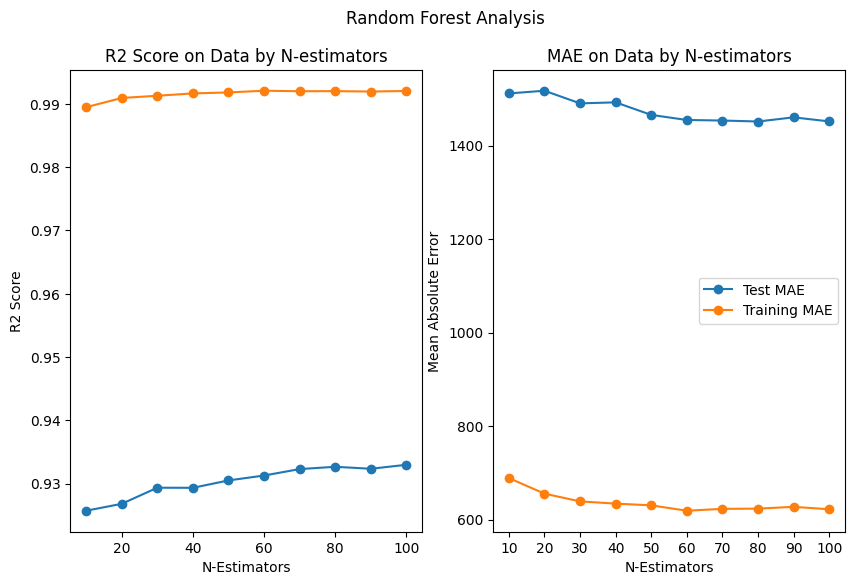

In [ ]:
#Plot the results
x = [i*10 for i in range(1,11)]

fig, ax = plt.subplots(1,2,figsize=(10, 6))

ax[0].plot(x, test_r2, label='Test R2 Scores', marker='o')
ax[0].plot(x, train_r2, label='Training R2 Scores', marker='o')

ax[0].set_xlabel('N-Estimators')
ax[0].set_ylabel('R2 Score')
ax[0].set_title('R2 Score on Data by N-estimators')

ax[1].plot(x, test_mae, label='Test MAE', marker='o')
ax[1].plot(x, train_mae, label='Training MAE', marker='o')

ax[1].set_xlabel('N-Estimators')
ax[1].set_ylabel('Mean Absolute Error')
ax[1].set_title('MAE on Data by N-estimators')

plt.legend()
plt.xticks(x)
plt.suptitle("Random Forest Analysis")
plt.show()

From the visualizations above, we see that the random forest model fairly consistently performs well regardless of n-estimators. However, we see a continuous increase in performance as we increase n-estimators, so we will pick 100 as our ideal n-estimators.

In [ ]:
rf_r2 = test_r2[9]
rf_mae = test_mae[9]

Looking at the result of all 4 of our models:

In [ ]:
print("R2 Scores: ")
print("Linear Regression: {}".format(linear_r2))
print("Polynomial Regression (degree 6): {}".format(poly_r2))
print("Decision Tree (depth 7): {}".format(tree_r2))
print("Random Forest (100 n-estimators): {}".format(rf_r2))
print("\n")
print("Mean Absolute Error: ")
print("Linear Regression: {}".format(linear_mae))
print("Polynomial Regression (degree 6): {}".format(poly_mae))
print("Decision Tree (depth 7): {}".format(tree_mae))
print("Random Forest (100 n-estimators): {}".format(rf_mae))

R2 Scores: 
Linear Regression: 0.8685676482064169
Polynomial Regression: 0.9451858228757567
Decision Tree: 0.893745551675184
Random Forest: 0.9329891489338344


Mean Absolute Error: 
Linear Regression: 2393.950168590739
Polynomial Regression: 1383.5229598228593
Decision Tree: 1862.4305
Random Forest: 1451.9907430952398


From this, we can see that the model with the best performance is polynomial regression with a degree of 6. Thus, when predicting mean income of regions in the future, this model should be preferred.